In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 6: kmeans vs hierarchical clustering

Use kmeans and hierarchical clustering to find the **two clusters** in the following datasets.

In [5]:
def kmeans(X,k,max_iterations=1000):
    from sklearn.metrics import pairwise_distances
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k,replace=False)] 
    dist = pairwise_distances(X,means)
    clusters = np.argmin(dist, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        dist = pairwise_distances(X,means)
        new_clusters = np.argmin(dist, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    return clusters, means

In [6]:
def hierarchical_clustering(X,n_clusters=1):   
    from sklearn.metrics import pairwise_distances
    
     #dataset size, number of features
    m,n = X.shape
    
    # cluster distance matrix
    dist = pairwise_distances(X)
    np.fill_diagonal(dist, np.inf)
    
    # Make each point its own cluster of one
    k = m 
    clusters = np.arange(k)

    # hierarchical clustering iteration'
    while k>n_clusters:  
        
        # find closest clusters
        i, j = np.unravel_index(np.argmin(dist),(k,k))
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        # merge clusters
        clusters[clusters==j]=i

        # rename clusters
        clusters[clusters>j] -= 1
        
        # recompute distance from the new cluster i to the remaining clusters'
        dist[i] = np.minimum(dist[i],dist[j]) # 
        dist[:,i] = dist[i] # distance_clusters matrix is symmetric
        dist[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        # remove row j and column j from distance_clusters matrix
        dist = np.delete(dist,j,0) # remove row j
        dist = np.delete(dist,j,1) # remove column j
        
    
        # reduce number of clusters
        k = k-1

    return clusters

**Dataset 1: Eye of Sauron**

Text(0.5, 1.0, 'Eye of Sauron')

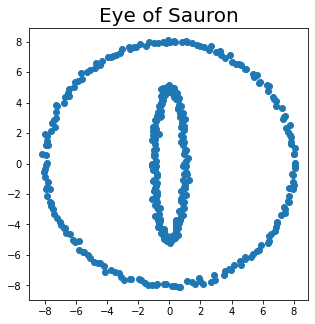

In [7]:
X = np.zeros((400,2))

# cluster 1:
theta = np.linspace(0,2*np.pi,200) 
X[0:200,0] = 8*np.sin(theta)+0.1*np.random.randn(200)
X[0:200,1] = 8*np.cos(theta)+0.1*np.random.randn(200)
# cluster 2:
X[200:400,0] = 1*np.sin(theta)+0.1*np.random.randn(200)
X[200:400,1] = 5*np.cos(theta)+0.1*np.random.randn(200)

plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'o')
plt.title('Eye of Sauron',fontsize=20)

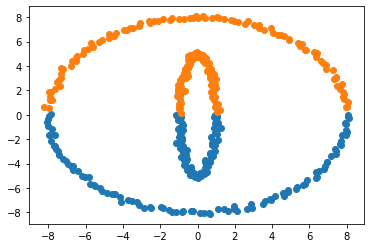

In [12]:
# k-means
k = 2
clusters,_ = kmeans(X,k)
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1])

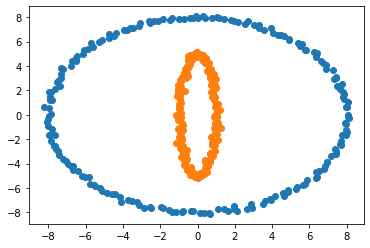

In [13]:
# hierarchical clustering
clusters = hierarchical_clustering(X,n_clusters=k)
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1])

**Dataset 2: connected circles**

Text(0.5, 1.0, 'Connected circles')

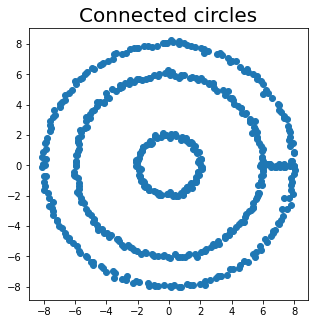

In [19]:
X = np.zeros((525,2))

# cluster 1:
theta = np.linspace(0,2*np.pi,200) 
X[0:200,0] = 8*np.sin(theta)+0.1*np.random.randn(200)
X[0:200,1] = 8*np.cos(theta)+0.1*np.random.randn(200)

X[200:400,0] = 6*np.sin(theta)+0.1*np.random.randn(200)
X[200:400,1] = 6*np.cos(theta)+0.1*np.random.randn(200)

X[400:425,0] = 6 + 2*np.random.rand(25)
X[400:425,1] = 0.1*np.random.randn(25)

# cluster 2:
theta = np.linspace(0,2*np.pi,100)
X[425:525,0] = 2*np.sin(theta)+0.1*np.random.randn(100)
X[425:525,1] = 2*np.cos(theta)+0.1*np.random.randn(100)

plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'o')
plt.title('Connected circles',fontsize=20)

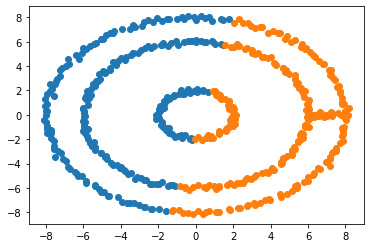

In [15]:
# k-means
k = 2
clusters,_ = kmeans(X,k)
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1])

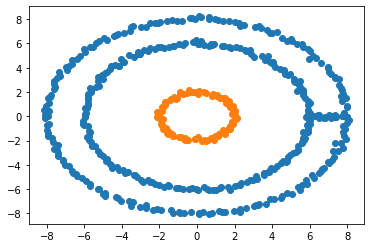

In [20]:
# hierarchical clustering
clusters = hierarchical_clustering(X,n_clusters=k)
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1])

**Dataset 3: interlocked rings (3D)**

Text(0.5, 0.92, 'Interlocked rings')

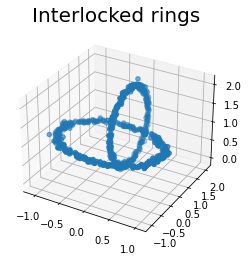

In [21]:
from mpl_toolkits.mplot3d import Axes3D 
X = np.zeros((600,3))

# cluster 1:
theta = np.linspace(0,2*np.pi,300) 
X[0:300,0] = np.sin(theta)+0.05*np.random.randn(300)
X[0:300,1] = np.cos(theta)+0.05*np.random.randn(300)
X[0:300,2] = np.ones(300)

# cluster 2:
X[300:600,0] = np.zeros(300)
X[300:600,1] = np.sin(theta)+1+0.05*np.random.randn(300)
X[300:600,2] = np.cos(theta)+1+0.05*np.random.randn(300)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.title('Interlocked rings',fontsize=20)

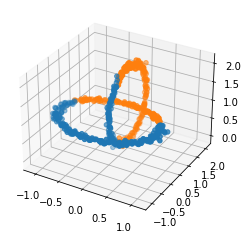

In [18]:
# k-means
fig = plt.figure()
ax = plt.axes(projection='3d')
k = 2
clusters,_ = kmeans(X,k)
for i in range(k):
    ax.scatter(X[clusters==i,0],X[clusters==i,1],X[clusters==i,2])

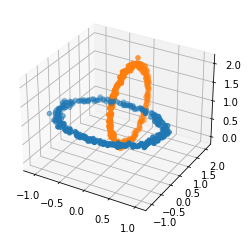

In [22]:
# hierarchical clustering
fig = plt.figure()
ax = plt.axes(projection='3d')
clusters = hierarchical_clustering(X,n_clusters=k)
for i in range(k):
    ax.scatter(X[clusters==i,0],X[clusters==i,1],X[clusters==i,2])